In [9]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD027742" # Indicate Dataset Here

filepath = dataset_id + "/psm.TSV"

identifier = "434x Carrier"

psm_df = pd.read_csv(filepath, delimiter = "\t")

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.95]

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*(.+)\.pep\.xml$")

datasets = psm_df["File_Name"].unique()

print(datasets)

# psm_df = psm_df.drop(["126", "127N", "127C"], axis=1)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=["126","127N","127C","128C","128N","129C","129N","130C",
                                                                "130N","131C","131N","132C","132N","133C","133N","134N"])

data_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]

channels = ["128C","129C","129N","130C","130N","131C","131N","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because
c_channels = ["128C","129C","130C","131C"]
n_channels = ["129N","130N","131N","132N"]
medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)
medians_df['C_Median'] = medians_df[c_channels].median(axis=1)
medians_df['N_Median'] = medians_df[n_channels].median(axis=1)

# psm_df
medians_df

# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

['interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_No126_100pg_AGC300_1'
 'interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_No126_100pg_AGC300_2']


,128C,129C,129N,130C,130N,131C,131N,132N,132C,133N,133C,134N,Median,C_Median,N_Median
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,21552.4531,21794.8867,22032.1504,21479.584,19680.0352,19747.6719,19332.0762,19105.3867,18511.7285,21690.0703,16281.4365,20143.0371,19945.354500,21516.018550,19506.055700
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,21265.8193,21357.94045,21916.5166,20958.06835,19915.67675,19811.6797,19362.45705,19281.23435,18494.4082,21688.14945,16185.64455,19982.2949,19948.985825,21111.943825,19639.066900
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,17402.2773,13984.3838,13943.3809,13393.9141,12719.7188,12944.1045,12655.8818,12250.5967,12393.002,13615.6299,10645.6875,13018.583,12981.343750,13689.148950,12687.800300
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,18137.3711,14122.9238,14246.6982,13776.7773,12892.3936,13446.6221,13012.9004,12370.8145,12210.875,14196.0664,10898.0684,13372.25,13409.436050,13949.850550,12952.647000
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,17137.0059,16673.9756,17007.55275,16415.86325,15306.6816,15085.06105,14781.41945,14823.7925,14335.4121,16900.9375,12597.6201,15563.62645,15435.154025,16544.919425,15065.237050
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,17717.4209,17046.125,17592.38865,16912.99215,15858.26465,15622.7329,15401.2793,15230.0024,14751.8633,17545.69435,12947.99025,15864.27885,15861.271750,16979.558575,15629.771975
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,21511.5781,13151.20505,13422.20705,13197.1777,12171.16505,12160.2427,11909.85935,11643.78365,11542.44045,13001.36475,10342.5464,12364.2803,12267.722675,13174.191375,12040.512200
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,21435.0449,13159.1201,13600.3779,13136.2412,12223.9736,12176.4902,11947.6826,11856.7549,11839.334,13517.4893,10260.9814,12329.3711,12276.672350,13147.680650,12085.828100
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,16429.43555,14678.292,15232.9873,14757.8291,13539.4541,13693.1147,13332.5405,13281.81785,12983.13675,14898.9004,11443.9209,13825.5547,13759.334700,14718.060550,13435.997300
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,14506.01465,12981.2207,13308.0786,12815.76075,12153.1631,12328.93115,11906.31545,11733.49265,11384.3584,13248.65185,10167.603,12309.6636,12319.297375,12898.490725,12029.739275


In [10]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]
        
variance_df

,128C,129C,129N,130C,130N,131C,131N,132N,132C,133N,133C,134N
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,1.080575,1.09273,1.104626,1.076922,0.986698,0.990089,0.969252,0.957887,0.928122,1.087475,0.816302,1.009911
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,1.06601,1.070628,1.098628,1.050583,0.99833,0.993117,0.970599,0.966527,0.927085,1.087181,0.811352,1.00167
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.340561,1.077268,1.074109,1.031782,0.979846,0.997131,0.974928,0.943708,0.954678,1.048861,0.820076,1.002869
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.352583,1.053208,1.062438,1.027394,0.961442,1.002773,0.970429,0.922545,0.910618,1.058662,0.812716,0.997227
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.110258,1.08026,1.101871,1.063537,0.991677,0.977318,0.957646,0.960392,0.928751,1.094964,0.816164,1.008323
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.117024,1.074701,1.109141,1.066307,0.99981,0.984961,0.970999,0.960201,0.930056,1.106197,0.816327,1.00019
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,1.75351,1.072017,1.094107,1.075764,0.992129,0.991239,0.970829,0.94914,0.940879,1.059803,0.84307,1.007871
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,1.745998,1.07188,1.107823,1.070016,0.995707,0.99184,0.973202,0.965795,0.964376,1.101071,0.835811,1.004293
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.194057,1.066788,1.107102,1.072569,0.98402,0.995187,0.968981,0.965295,0.943588,1.082821,0.831721,1.004813
interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.177503,1.053731,1.080263,1.0403,0.986514,1.000782,0.966477,0.952448,0.924108,1.075439,0.82534,0.999218


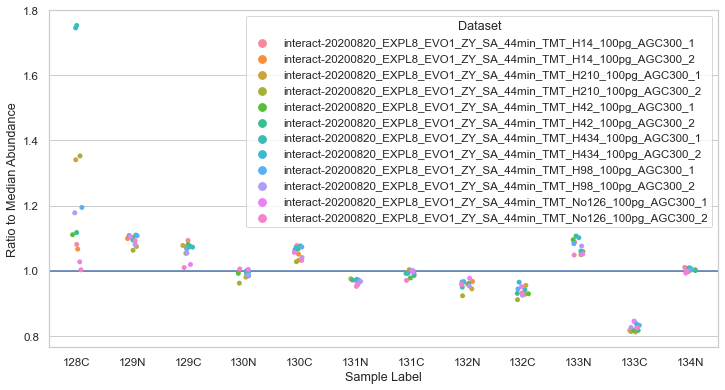

In [11]:
to_graph_df = pd.melt(variance_df, value_vars=["128C","129C","129N","130C","130N","131C","131N","132N","132C","133N","133C","134N"], ignore_index=False)
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)
# true_colors = ["#E1DCEE", "#9DE4AA", "#CADBF1", "#E8CBD9"]
# sns.set_palette(sns.color_palette(colors))

# TODO: Make a spreadsheet with color matches for all datasets

# PXD027742
# color_match = {"df_No_1": "#000000", "df_No_2": "#000000", "df_14_1": "#56B4E9", "df_14_2": "#56B4E9",
#                "df_42_1": "#009E73", "df_42_2": "#009E73", "df_98_1": "#E69F00", "df_98_2": "#E69F00",
#                "df_210_1": "#F0E442", "df_210_2": "#F0E442", "df_434_1": "#CC79A7", "df_434_2": "#CC79A7"}


# color_match = {"df_100": "#000000", "df_200": "#56B4E9", "df_300": "#009E73", "df_400": "#E69F00",
#                "df_600": "#F0E442", "df_800": "#CC79A7"}

sns.set(font_scale=1.05)
sns.set_style("whitegrid")

boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Dataset", 
                     order=["128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

# plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3', 'legendEntry4', 'legendEntry5', '6', '7', '8'])
# sns.move_legend(boxplot, "center left")

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()